Logistic Regression Performance:
Accuracy: 0.9590
Precision: 0.8909
Recall: 0.9074
F1-Score: 0.8991


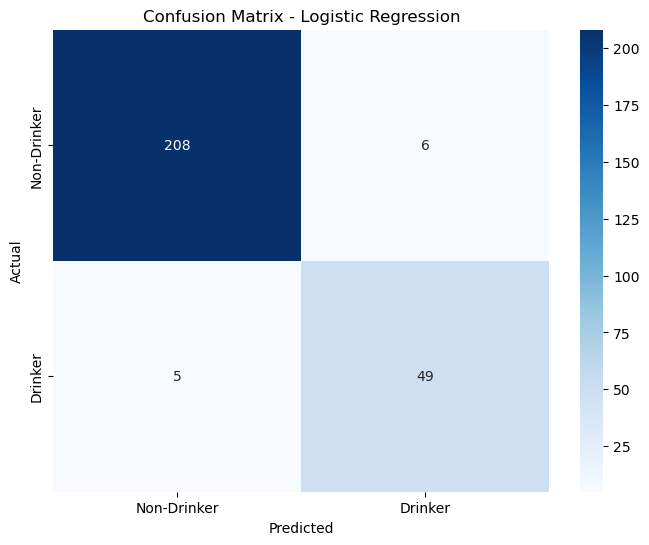


Feature Coefficients:
    Feature  Coefficient
5   charges     3.930752
1       sex     0.417295
4    region     0.050814
3  children    -0.139873
0       age    -1.184560
2       bmi    -1.695198


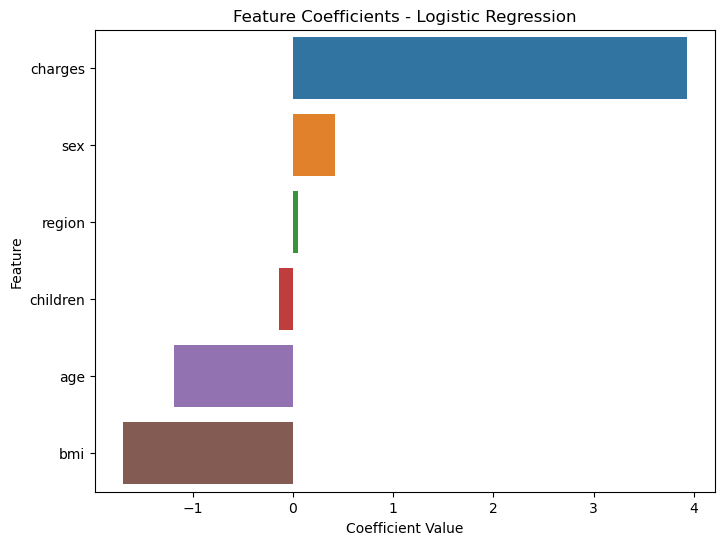

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('MedicalData1.csv')  # Replace 'MedicalData.csv' with the actual file path

# Encode categorical variables
label_encoders = {
    'sex': LabelEncoder(),
    'region': LabelEncoder(),
    'drinker': LabelEncoder()
}

for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Scale numerical variables
scaler = StandardScaler()
data[['age', 'bmi', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'charges']])

# Separate features and target variable
X = data.drop('drinker', axis=1)
y = data['drinker']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Drinker', 'Drinker'], yticklabels=['Non-Drinker', 'Drinker'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display Logistic Regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)

# Plot coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


Gradient Boosting Classifier Performance:
Accuracy: 0.9701
Precision: 0.8833
Recall: 0.9815
F1-Score: 0.9298


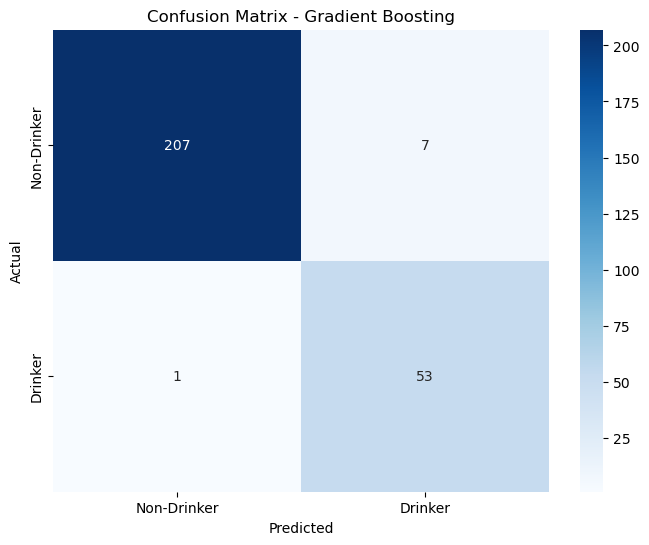

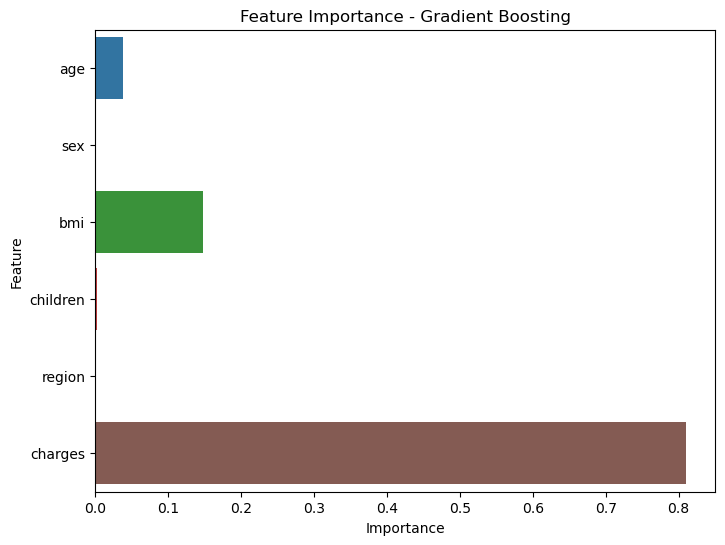

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('MedicalData1.csv')  # Replace 'MedicalData.csv' with the actual file path

# Encode categorical variables
label_encoders = {
    'sex': LabelEncoder(),
    'region': LabelEncoder(),
    'drinker': LabelEncoder()
}

for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Scale numerical variables
scaler = StandardScaler()
data[['age', 'bmi', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'charges']])

# Separate features and target variable
X = data.drop('drinker', axis=1)
y = data['drinker']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Drinker', 'Drinker'], yticklabels=['Non-Drinker', 'Drinker'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot feature importance
importances = gb_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
